# Sustainable energy companies or Unsustainable? 
#### See the situation on the market right now!
The intuition behind this tool is that we insert both stocks considered as sustainable and unsustainabke (preferably in the same count) and than observe how many of the selected sustainable assets made it to the final portolio according to different optimizing strategies. The outcome can serve as a proxy for market performance disparities between companies considered sustainable and unsustainable.

##  Data analysis and visualisation part

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
import yfinance as yf
import seaborn as sns
import functools as reduce
from scipy import optimize

# Import modules
import portfolio_optimization as pto
import EDA
import Portfolio_visualizations
import sustainability_calculations

## Loading the Data 
- We will take some of the biggest renewable Energy Companies in the World, as well as unsustainable (e.g. coal mining, gas, ..)
- feel free to add some more, do not forget to indicate them whether they are sustainable or not!:)

### Processing user input

In [26]:
sustainable_stocks = ['AQN', 'BEPC', 'CEG', 'CSIQ', 'DQ', 'GE', 'IBDRY', 'JKS', 'VWDRY',
                      'NEE', 'TSLA', 'LPX', 'WTS', 'HASI', '006400.KS', '247540.KQ', 'ENPH', 'BYND']
unsustainable_stocks = ['EQNR', 'BP', '0857.HK', 'COP', 'FP.VI', 'SHEL', 'CVX', 'SR', 'ENEL.MI',
                       'PM', 'BTI', 'BTC-USD', 'WMT', 'DIS', 'PYPL', 'UA', 'CMCSA', 'ORCL',  'NWSA', 'SKX']
#in case you want to add stock, you shall indicate if the stock is sustainable or not!

We have selected one of the biggest energy companies on both sides, sustainable and unsustainable.
- Sustainable stocks = Algonquin Power & Utilities Corp., Brookfield Renewable Corporation, Constellation Energy Corporation, Canadian Solar Inc., Daqo New Energy Corp.,General Electric Company, Iberdrola, S.A., JinkoSolar Holding Co., Ltd., NextEra Energy, Inc., Vestas Wind Systems A/S

- Unsustainable stocks = Equinor ASA, BP p.l.c., PetroChina Company Limited, ConocoPhillips, TotalEnergies SE, Shell plc, Chevron Corporation, Spire Inc., Enel SpA

In [27]:
# Default list of tickers - energy companies
default_tickers = [
    'AQN', 'BEPC', 'CEG', 'CSIQ', 'DQ', 'GE', 'IBDRY', 'JKS', 'NEE', 'VWDRY',
    'EQNR', 'BP', '0857.HK', 'COP', 'FP.VI', 'SHEL', 'CVX', 'SR', 'ENEL.MI'
]

# Prompt the user for additional tickers (optional)
user_input_str = input("Enter any additional tickers you want to analyze, separated by a comma, or press Enter to use default stocks only: ")

# Split the user input into a list, remove any empty strings
additional_tickers = [ticker.strip() for ticker in user_input_str.split(',') if ticker]

# Combine the default tickers with any additional tickers provided by the user
tickers = default_tickers + additional_tickers

# Create the adjusted close price dataframe
adj_close_df = pd.DataFrame()

# Populate the dataframe with adjusted close price data for the specified assets
for ticker in tickers:
    try:
        print(f"Downloading data for {ticker}")
        data = yf.download(ticker, period="2y", interval="1d")
        if not data.empty:
            adj_close_df[ticker] = data["Adj Close"]
        else:
            print(f"No data found for {ticker}, skipping.")
    except Exception as e:
        print(f"Failed to download {ticker}: {e}, skipping.")

Enter any additional tickers you want to analyze, separated by a comma, or press Enter to use default stocks only:  TSLA, LPX, WTS, HASI, 006400.KS, 247540.KQ, ENPH, BEP, BYND, PM, BTI, BTC-USD, WMT, DIS,CMCSA, ORCL, NWSA, SKX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

as optinal stocks, we propose to Add following stocks:
- Trending Sustainable: TSLA, LPX, WTS, HASI, 006400.KS, 247540.KQ, ENPH, BEP, BYND
- Unsustainable - mostly very bad ESG rating:  PM, BTI, BTC-USD, WMT, DIS,CMCSA, ORCL, NWSA, SKX
  
 = Tesla Inc. , Louisiana-Pacific Corp., Watts Water Technologies Inc, 
Hannon Armstrong Sustainable Infrastructure Capital Inc., Samsung SDI Co. Ltd.  
Ecopro BM Co. Ltd., Enphase Energy, Brookfield Renewable Partners L.P., Beyond Mea n, Vestas Wind Systems 
 
 = Philip Morris International Inc., British American Tobacco p.l.c., Bitcoin USD, Walmart Inc., The Walt Disney Company, Inc., Inc., Comcast, Oracle Corporation, News Corporation, Skechers U.S.A., Inc.SKX 

Shape of the DataFrame: (503, 37)
First 5 rows of the DataFrame:
                  AQN       BEPC        CEG       CSIQ         DQ         GE  \
Date                                                                           
2022-02-08  12.442011  31.439518  44.547150  27.340000  38.919998  76.960739   
2022-02-09  12.591596  32.636688  46.319248  28.200001  42.400002  76.914230   
2022-02-10  12.389215  32.120991  46.064690  27.910000  40.580002  76.557755   
2022-02-11  12.301222  31.890766  47.082912  27.600000  38.790001  75.038849   
2022-02-14  12.248428  31.817085  47.102489  27.360001  38.200001  74.860596   

                IBDRY        JKS        NEE     VWDRY  ...       BYND  \
Date                                                   ...              
2022-02-08  39.472336  40.099373  71.855095  8.255078  ...  59.900002   
2022-02-09  39.865509  41.496296  72.997772  8.644374  ...  62.669998   
2022-02-10  39.792358  41.113579  71.845581  8.255078  ...  61.490002   
2022-02-1

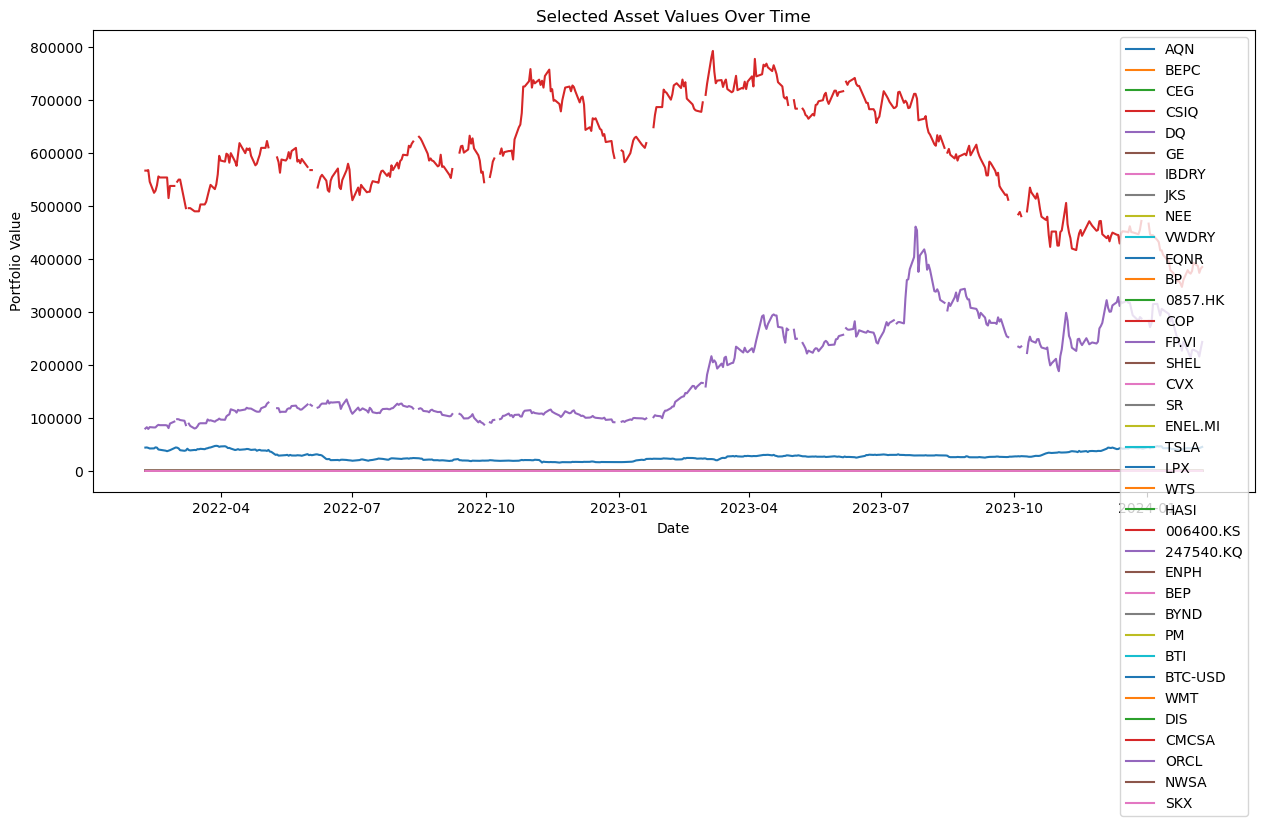

C:\Users\Terstudy\Desktop\PTYHON\Python_Final_project-main (1)\Python_Final_project-main\Portfolio Selection and Analysis\EDA.py:60: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=3.0)


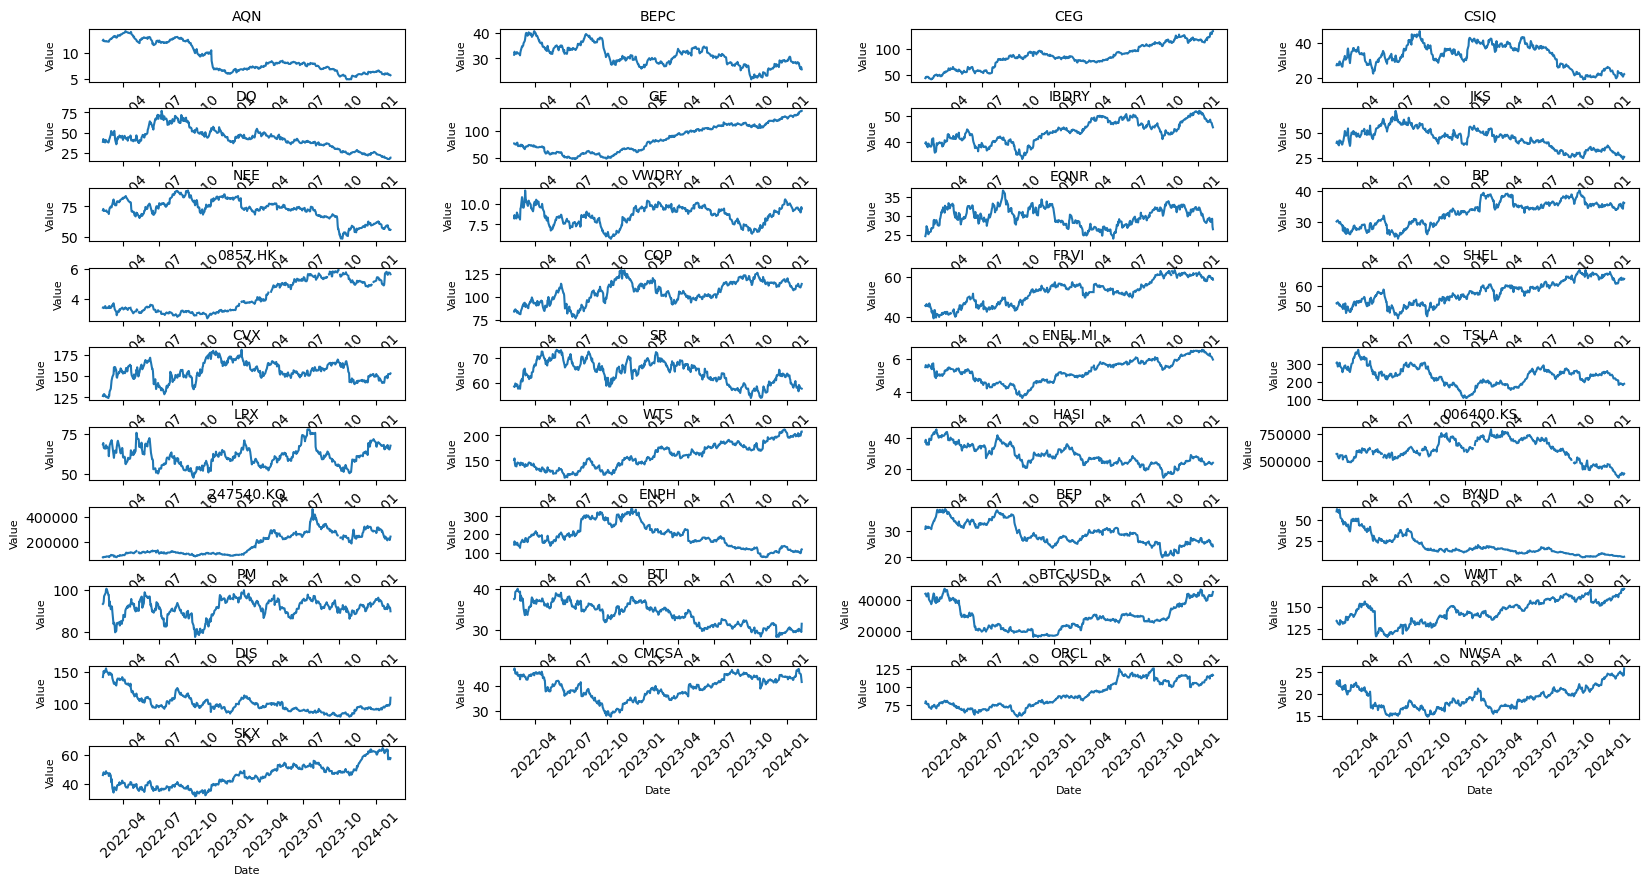

Box plot for distribution analysis


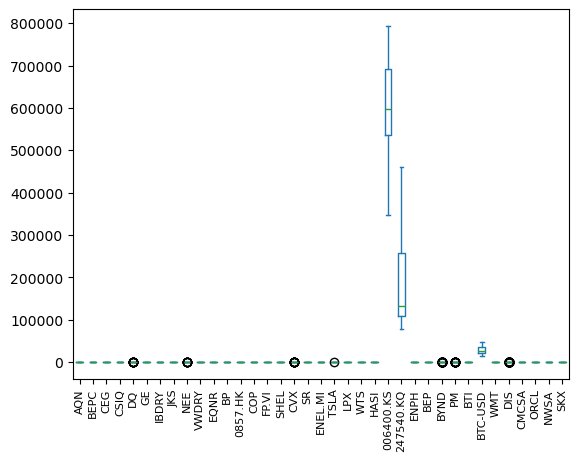

Heatmap for Correlation Between Assets


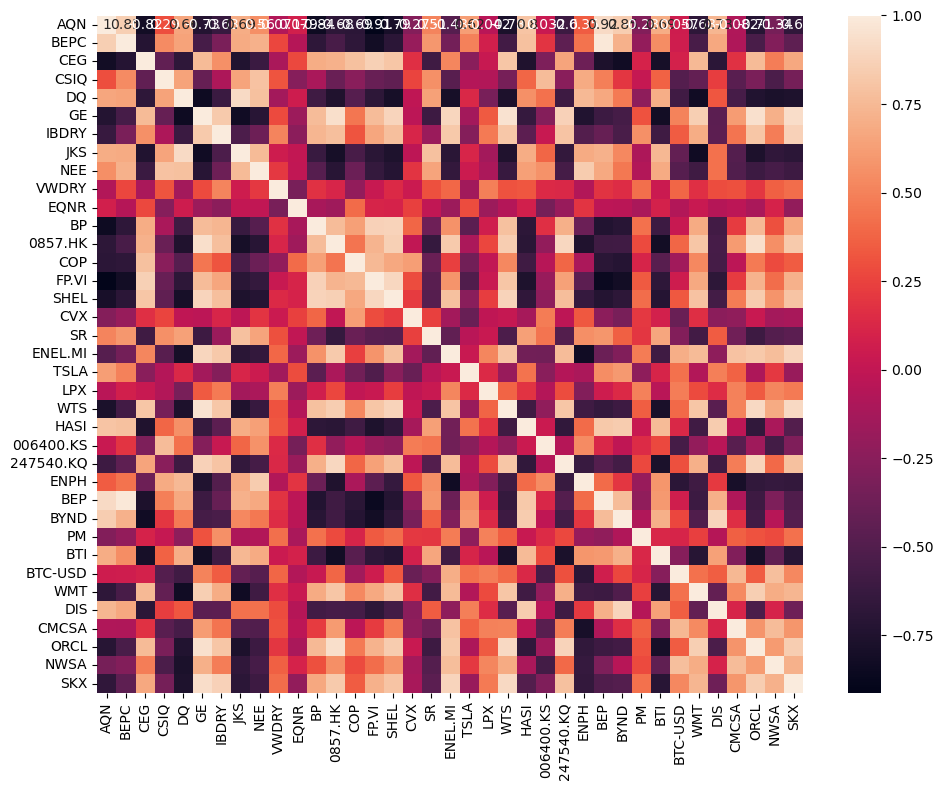

In [28]:
# Primary analysis
EDA.analyze_dataset(adj_close_df, summary_stat= True, data_quality = True, exploratory_analysis= True)

## Weights selection

#### Optimal weights of assets

Maxmimum Expected Return Method:
Expected Annual Return: 0.3185
Expected Volatility: 0.2499
Sharpe Ratio: 1.3546
Minimum Variance Method:
Expected Annual Return: -0.0115
Expected Volatility: 0.1226
Sharpe Ratio: 0.0693
Maximum Sharpe Ratio Method:
Expected Annual Return: 0.2572
Expected Volatility: 0.1729
Sharpe Ratio: 1.6026


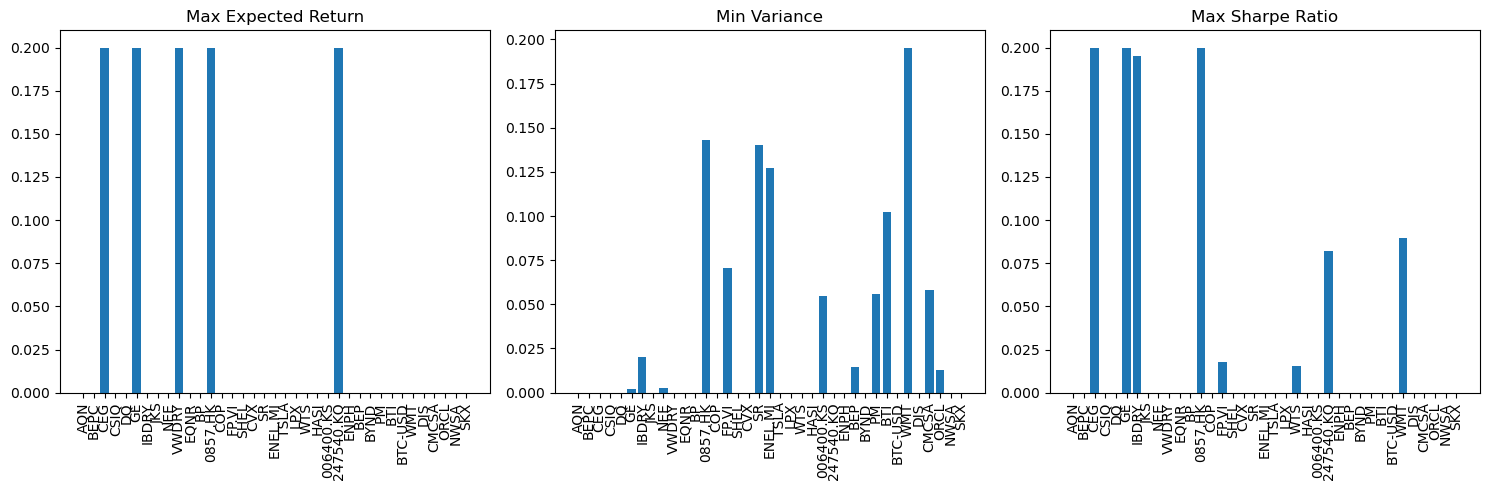

In [29]:
Portfolio_visualizations.optimal_weights_plot(adj_close_df, tickers)

In [34]:
# Optimal portfolio information for max_exp_return
optimal_result_max_exp_return = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_exp_return")
optimal_weights_max_exp_return = optimal_result_max_exp_return.x

# Optimal portfolio information for min_variance
optimal_result_min_variance = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="min_variance")
optimal_weights_min_variance = optimal_result_min_variance.x

# Optimal portfolio information for max_sharpe
optimal_result_max_sharpe = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_sharpe")
optimal_weights_max_sharpe = optimal_result_max_sharpe.x

Maximum Expected Return Method Sustainability Weights:
Sustainable Weight: 0.8000
Unsustainable Weight: 0.2000
According to the optimizing strategy 'Maximum Expected Return', the sustainable companies outperform unsustainable ones in the chosen time frame.
---

Minimum Variance Method Sustainability Weights:
Sustainable Weight: 0.0797
Unsustainable Weight: 0.9057
According to the optimizing strategy 'Minimum Variance', the unsustainable companies outperform sustainable ones in the chosen time frame.
---

Maximum Sharpe Ratio Method Sustainability Weights:
Sustainable Weight: 0.6925
Unsustainable Weight: 0.3075
According to the optimizing strategy 'Maximum Sharpe Ratio', the sustainable companies outperform unsustainable ones in the chosen time frame.
---



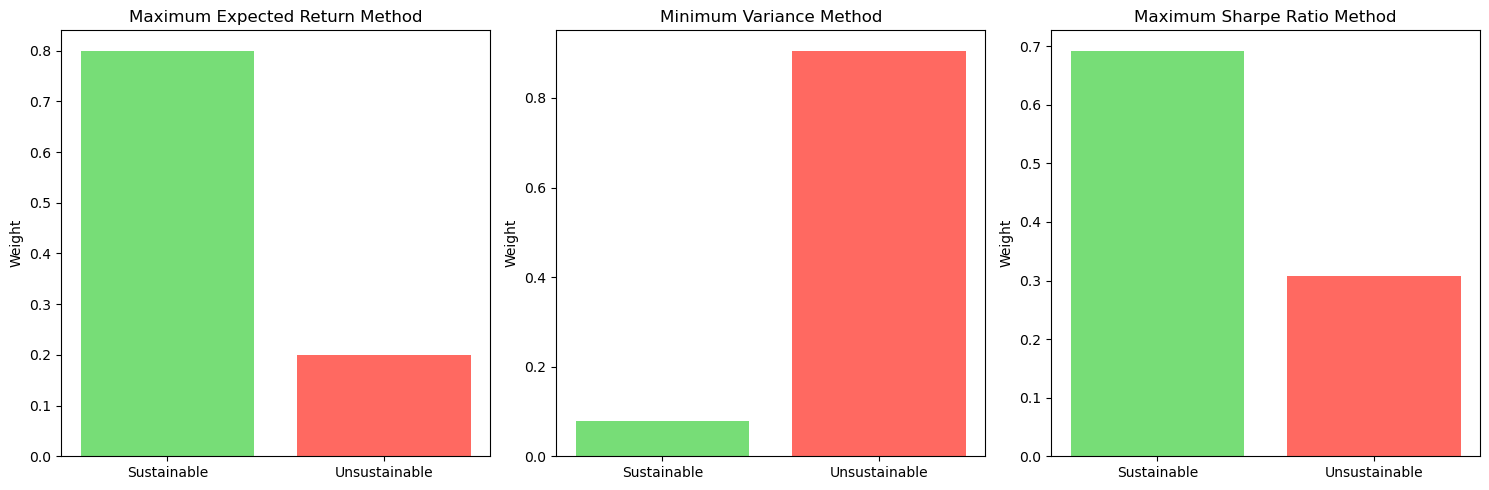

In [35]:
optimal_weights = [optimal_weights_max_exp_return, optimal_weights_min_variance, optimal_weights_max_sharpe]
method_names = ['Maximum Expected Return', 'Minimum Variance', 'Maximum Sharpe Ratio']
summaries = sustainability_calculations.process_results_and_generate_summaries(optimal_weights, tickers, sustainable_stocks, unsustainable_stocks, method_names)

#### Mind, that the resulting combination of stocks largely depends on the maxmimum allowed weight assigned to one asset during the optimization, feel free to mainuplate the weight to check robustness of your conclusions